# Preparación de datos

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Diciembre de 2024  
**Versión:** 1.0

**Fecha de Actualización:** Septiembre de 2025  
**Versión:** 2.0


---

## Descripción

Este notebook ofrece un ejemplo de las técnicas de preparación de datos.

Se revisan técnicas de tratamiento de nulos.

Se revisan varias alternativas de transformación de las variables categóricas:

+ Generación de variables dummies de forma manual.
+ Uso del método get_dummies disponible en pandas.
+ Uso de LabelEncoder.
+ Uso de OneHotEncoder.
+ Uso de Target Encoding.
+ Uso de Frequency Encoding.
+ Uso de Ordinal Encoding.

Finalmente, se expone la detección de duplicados y la acción aplicable sobre ellos.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.6.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/Mineria_de_datos/master/datos/Wine_Quality.csv
!wget https://raw.githubusercontent.com/JaznaLaProfe/Mineria_de_datos/master/datos/Students_Performance_mv.csv

--2025-09-16 11:53:17--  https://raw.githubusercontent.com/JaznaLaProfe/Mineria_de_datos/master/datos/Wine_Quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390374 (381K) [text/plain]
Saving to: ‘Wine_Quality.csv’

Wine_Quality.csv    100%[===================>] 381.22K  --.-KB/s    in 0.008s  

2025-09-16 11:53:17 (48.6 MB/s) - ‘Wine_Quality.csv’ saved [390374/390374]

--2025-09-16 11:53:17--  https://raw.githubusercontent.com/JaznaLaProfe/Mineria_de_datos/master/datos/Students_Performance_mv.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

In [ ]:
# Carga de los datos
data = pd.read_csv("Wine_Quality.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Cantidad de observaciones y características
data.shape

(6497, 13)

# Análisis de calidad

In [ ]:
def buscar_atipicos(data : pd.DataFrame, columna : str) -> pd.DataFrame:
  """
  Busca valores atípicos en una columna.
  """
  # Calcular los límites
  Q1 = data[columna].quantile(0.25)
  Q3 = data[columna].quantile(0.75)
  # Calcula rango intercuartilico
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Filtrar outliers
  return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

def obtener_cantidad_atipicos(data : pd.DataFrame, columnas : np.array) -> dict:
  """
  Obtiene la cantidad de atípicos por cada columna.
  """
  total_atipicos = {}
  for columna in data[columnas]:
    atipicos = buscar_atipicos(data, columna)
    total_atipicos[columna] = atipicos.shape[0]
  return total_atipicos



## Existencia de atípicos

In [ ]:
atipicos_por_columna = obtener_cantidad_atipicos(data, data.describe().columns)
atipicos_por_columna

{'fixed acidity': 357,
 'volatile acidity': 376,
 'citric acid': 508,
 'residual sugar': 118,
 'chlorides': 286,
 'free sulfur dioxide': 62,
 'total sulfur dioxide': 10,
 'density': 3,
 'pH': 73,
 'sulphates': 191,
 'alcohol': 3,
 'quality': 228}

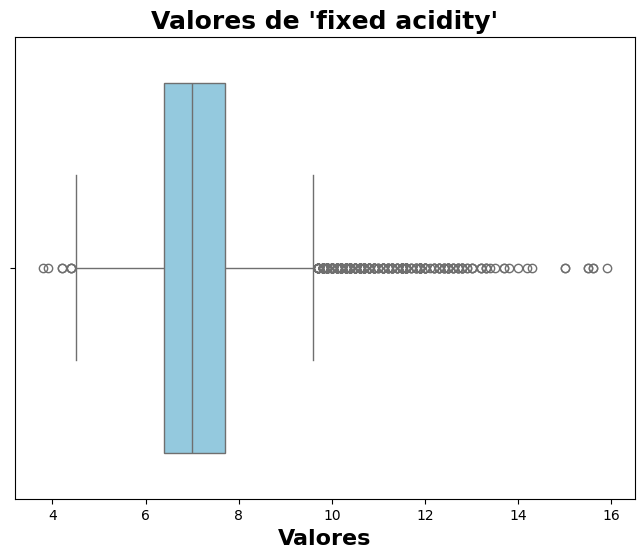

In [ ]:
# Gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['fixed acidity'], color='skyblue')
plt.title("Valores de 'fixed acidity'", fontsize=18, fontweight="bold")
plt.xlabel('Valores', fontsize=16, fontweight="bold")
plt.show()

In [ ]:
data['fixed acidity'].describe().round(2)

,fixed acidity
count,6487.00
mean,7.22
std,1.30
min,3.80
25%,6.40
50%,7.00
75%,7.70
max,15.90


## Existencia de duplicados

In [ ]:
duplicados = data[data.duplicated(keep=False)]
duplicados

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6477,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [ ]:
def obtiene_duplicados(repetidos : pd.DataFrame, indice : int, columnas : np.array) -> pd.DataFrame:
  """
  Obtiene los duplicados de una fila en particular.
  """
  # Buscar todos los duplicados respecto de una determinada fila
  fila_seleccionada = repetidos.loc[indice]
  mascara = (repetidos == fila_seleccionada).all(axis=1)
  duplicados_fila = repetidos[mascara]
  return pd.DataFrame(duplicados_fila)

In [ ]:
# Obtiene algunos duplicados a modo de comprobación
obtiene_duplicados(duplicados, 0, [])

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


---
**Comentarios**

---

Se aprecia la existencia de duplicados de las filas de manera integra.

En la fase de tratamiento se procederá a eliminarlos

## Inspección de datos nulos

In [ ]:
# Información de las columnas con valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
# Muestra una tabla con los % de nulos de cada columna
columnas_con_nulos = data.isna().sum()[data.isna().sum() > 0]
porcentaje_nulos = (columnas_con_nulos / data.shape[0]) * 100

resultado = pd.DataFrame({
    "Cantidad Nulos": columnas_con_nulos,
    "Porcentaje Nulos (%)": porcentaje_nulos
}).round(2)

resultado

,Cantidad Nulos,Porcentaje Nulos (%)
fixed acidity,10,0.15
volatile acidity,8,0.12
citric acid,3,0.05
residual sugar,2,0.03
chlorides,2,0.03
pH,9,0.14
sulphates,4,0.06


---
**Comentarios**

---
Se aprecia la existencia de nulos, con porcentajes relativamente bajos. Sin embargo, estos deberán ser tratados en la fase siguiente

### Revisión visual

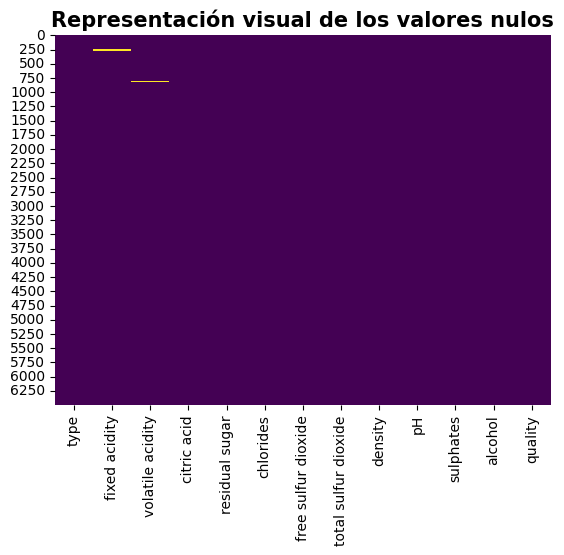

In [ ]:
# Genera un mapa de calor para ver la ubicación de los nulos
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Representación visual de los valores nulos", fontsize=15, fontweight="bold")
plt.show()

---
**Comentarios**

---
+ Las áreas oscuras indican valores no nulos.
+ Las áreas claras representan posiciones de los valores nulos en el conjunto de datos
+ Hay 2 columnas con valores nulos visibles: están en la parte superior del eje vertical, es decir, los valores nulos están concentrados en las primeras filas de esas columnas.


### Revisión estadística

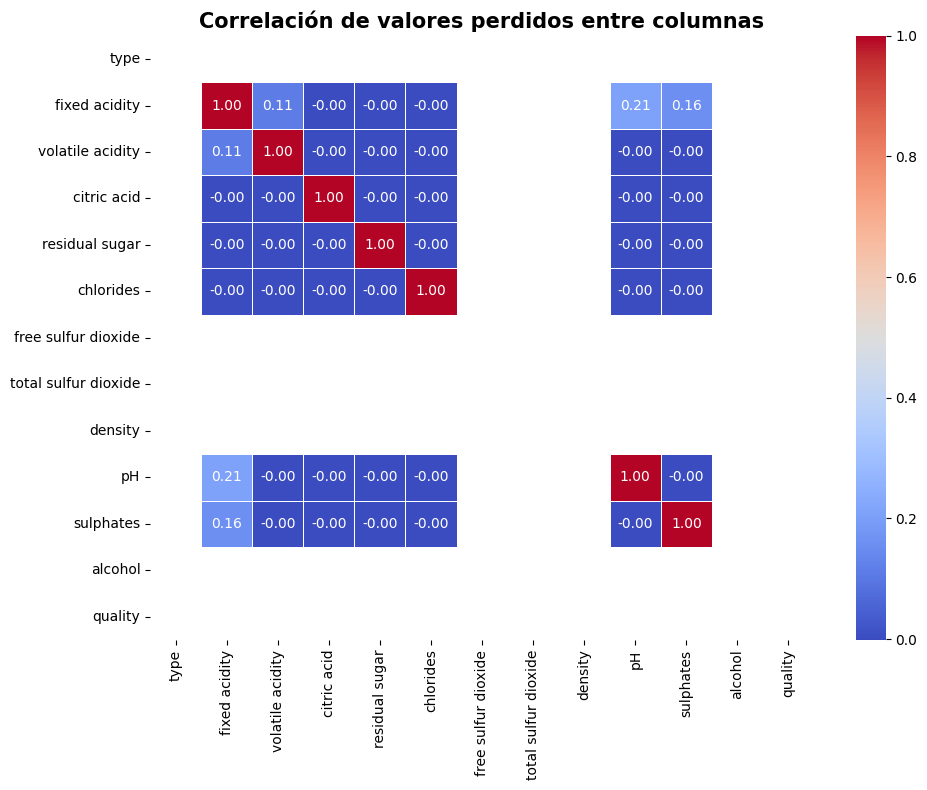

In [ ]:
def correlacion_valores_nulos(data : pd.DataFrame) -> None:
  """
  Calcula la correlación entre los valores nulos de las columnas.
  """
  valores_nulos = data.isnull().astype(int)
  correlation_matrix = valores_nulos.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
  plt.title("Correlación de valores perdidos entre columnas", fontsize=15, fontweight="bold")
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()

correlacion_valores_nulos(data)



---
**Comentario**


---
No existen relaciones o dependencias claras entre los valores faltantes y los datos observados.


## Análisis de consistencia

In [ ]:
# Revisa los tipos de datos
data.dtypes

,0
type,object
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64


---

**Comentarios**

---
Se analizará la consistencia de los valores de la única columna que contienen datos cualitativos:

+ `type`

Además, se considera el análisis de la variable `quality` porque, podría tratarse de una variable cualitativa que está *camuflada* como variable cuantitativa


In [ ]:
data.type.unique()

array(['white', 'red'], dtype=object)

---

**Comentarios**

---
Se aprecia INEXISTENCIA de valores inconsistentes en la columna

In [ ]:
data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

Esta columna representa la calidad del vino en una escala, por tanto, debe ser tratada como una variable categórica y se convierte

In [ ]:
# Convierte la variable a categórica
data.quality = data.quality.astype("category")

In [ ]:
data.quality.describe()

,quality
count,6497
unique,7
top,6
freq,2836


# Preparación de los datos

## Tratamiento de duplicados



---

**¿Qué hacer con los duplicados?**

---
Se deberían eliminar, para hacerlo se puede usar el siguiente código:



```
# Elimina duplicados considerando todas las columnas
data_sin_duplicados = data.drop_duplicates()

# Elimina duplicados basados en columnas específicas
data_sin_duplicados = data.drop_duplicates(subset=['col1', 'col2'])

```





In [ ]:
# Elimina duplicados considerando todas las columnas
data = data.drop_duplicates()
data.shape

(5329, 13)

## Tratamiento de valores nulos

Existen variadas técnicas para tratar los valores nulos:

+ Eliminarlos
+ Reemplazar por un valor representativo que depende del tipo de columna.
+ Usar técnicas más avanzadas como KNN-Imputer que reemplaza los valores nulos por un valor representativo de sus vecinos más cercanos (lo ideal es que los datos se encuentren estandarizados).

En caso de que la columna sea cuantitativa, las opciones son:
+ Reemplazar por el promedio: esto es recomendable **SÓLO ante la inexistencia de valores atípicos** (`paradoja de Bill Gates`)
+ Reemplazar por la mediana: esto es recomendable cuando existen valores atípicos.

En caso de que la columna sea cualitativa entonces se reemplaza por el **valor con mayor frecuencia (moda)**

![](https://www.researchgate.net/publication/342665787/figure/fig1/AS:909273085272072@1593799005750/Figura-2-Clasificacion-de-las-variables-estadisticas-Fuente-Recursos-para-la-formacion.png)

Dado que ya han sido tratados los duplicados, se vuelven a revisar los nulos

In [ ]:
# Muestra una tabla con los % de nulos de cada columna
columnas_con_nulos = data.isna().sum()[data.isna().sum() > 0]
porcentaje_nulos = (columnas_con_nulos / data.shape[0]) * 100

resultado = pd.DataFrame({
    "Cantidad Nulos": columnas_con_nulos,
    "Porcentaje Nulos (%)": porcentaje_nulos
}).round(2)

resultado

,Cantidad Nulos,Porcentaje Nulos (%)
fixed acidity,10,0.19
volatile acidity,8,0.15
citric acid,3,0.06
residual sugar,2,0.04
chlorides,2,0.04
pH,9,0.17
sulphates,4,0.08


### Variables cuantitativas

In [ ]:
def seleccion_tecnica(columna : str, data : pd.DataFrame, df_mean : pd.DataFrame, df_median : pd.DataFrame,
              df_knn : pd.DataFrame, info_atipicos : dict) -> tuple:
  """
  Selecciona el método de imputación más adecuado para una columna específica.
  """
  resultados = {}
  original_mean = data[columna].mean(skipna=True)

  # Verifica la inexistencia de atípicos para poder incluir la imputación por la media
  if info_atipicos[columna] == 0:
    imputed_mean = df_mean[columna].mean()

    abs_change = abs(original_mean - imputed_mean) / original_mean
    resultados["mean"] = abs_change

  imputed_mean = df_median[columna].mean()
  abs_change = abs(original_mean - imputed_mean) / original_mean
  resultados["median"] = abs_change

  imputed_mean = df_knn[columna].mean()
  abs_change = abs(original_mean - imputed_mean) / original_mean
  resultados["knn"] = abs_change

  # Obtiene la clave del menor valor
  resultado_minimo = min(resultados, key=resultados.get)
  return resultado_minimo, resultados

In [ ]:
data.pH.describe().round(2)

,pH
count,5320.00
mean,3.22
std,0.16
min,2.72
25%,3.11
50%,3.21
75%,3.33
max,4.01


A continuación se realiza un análisis de las técnicas de imputación para poder revisar el efecto que tiene en la distribución de la variable

In [ ]:
# 1) Elimina los valores nulos
df_dropped = data.dropna()

# 2) Imputación por el promedio (esta técnica NO DEBERÍA USARSE cuando existen atípicos)
df_mean = data.copy()
for col in df_mean.columns:
    if df_mean[col].isnull().sum() > 0:
        df_mean[col] = df_mean[col].fillna(df_mean[col].mean())

# 3) Imputación por la mediana (esta técnica DEBERÍA USARSE cuando existen atípicos)
df_median = data.copy()
for col in df_median.columns:
    if df_median[col].isnull().sum() > 0:
        df_median[col] = df_median[col].fillna(df_median[col].median())

# 4) Imputación k-NN: se debe eliminar primero la columna categórica
cuantitative_columns = data.drop(columns=['type'])
cualitative_columns = data[['type']]
# Estandarizar para obtener lo mejor de K-NN
scaler = StandardScaler()
cuantitative_scaled_columns = scaler.fit_transform(cuantitative_columns)
cuantitative_scaled_columns = pd.DataFrame(cuantitative_scaled_columns, columns=cuantitative_columns.columns)
# Imputación k-NN
imputer = KNNImputer(n_neighbors=5)
kNN_imputed_data = imputer.fit_transform(cuantitative_columns)

# Arma el DataFrame usando la imputación usando KNN
df_knn = pd.DataFrame(kNN_imputed_data, columns=cuantitative_columns.columns)
df_knn = pd.concat([cualitative_columns.reset_index(drop=True), df_knn], axis=1)

# Compara los resultados en el gráfico
def compara_imputaciones(original : pd.DataFrame, dropped : pd.DataFrame,
                        mean_imputed : pd.DataFrame, median_imputed : pd.DataFrame,
                        knn_imputed : pd.DataFrame, column : str):
    """
    Compara los resultados de las imputaciones en un gráfico.
    """
    plt.figure(figsize=(12, 6))
    sns.kdeplot(original[column].dropna(), label="Original", color="blue")
    sns.kdeplot(dropped[column], label="Eliminar nulos", color="red")
    sns.kdeplot(mean_imputed[column], label="Imputación por el promedio", color="green")
    sns.kdeplot(knn_imputed[column], label="Imputación k-NN", color="orange")
    sns.kdeplot(median_imputed[column], label="Imputación por la mediana", color="gray")
    plt.title(f"Comparación de métodos de imputación para '{column}'",
              fontsize=18, fontweight="bold")
    plt.legend()
    plt.show()


### Tratamiento de `pH`

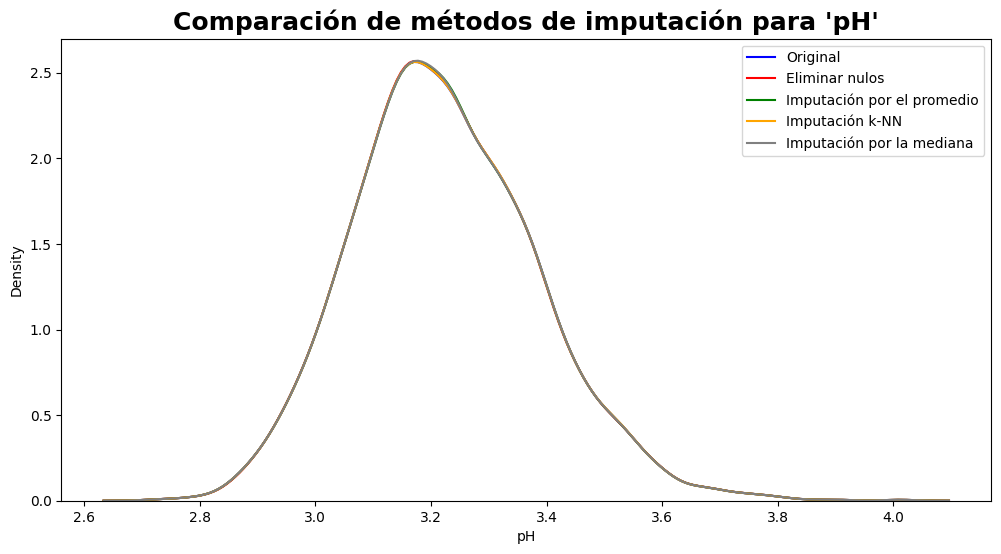

In [ ]:
# Análisis de la columna pH
compara_imputaciones(data, df_dropped, df_mean, df_median, df_knn, "pH")



---

**Comentarios para la columna `pH`**

---


Dado que todos los métodos dan resultados similares, es posible elegir con confianza cualquier enfoque DISTINTO al reemplazo por el promedio porque ya se tiene evidencia de que existen valores atípicos:


+ **Eliminación de filas:** si el número de valores faltantes es pequeño e insignificante.

+ **Imputación de media:** un método simple y computacionalmente eficiente que debería ser usado solo cuando NO EXISTEN ATÍPICOS.

+ **Imputación de mediana:** un método simple y computacionalmente eficiente que debería ser usado cuando EXISTEN ATÍPICOS.

+ **Imputación k-NN:** un poco más avanzada pero innecesaria aquí ya que no produce ninguna diferencia significativa.


In [ ]:
seleccion_tecnica("pH", data, df_mean, df_median, df_knn, atipicos_por_columna)

('median',
 {'median': np.float64(7.560252565270402e-06),
  'knn': np.float64(8.269337329390368e-06)})

In [ ]:
# Verifica nulos antes de imputar
print(f"Antes de imputar : {data.pH.isna().sum()}")
valor_reemplazo = data["pH"].median()
# Imputa los nulos de la columna
data.pH = data.pH.fillna(valor_reemplazo)
# Verifica los nulos después de imputar
print(f"Después de imputar : {data.pH.isna().sum()}")

Antes de imputar : 9
Después de imputar : 0


### Tratamiento de `fixed acidity`

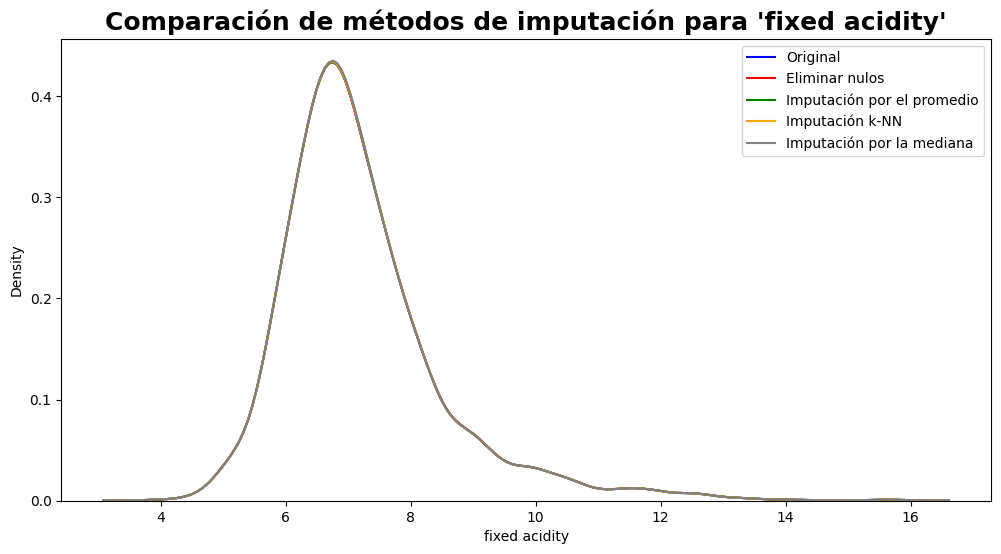

In [ ]:
# Análisis de la columna 'fixed acidity'
compara_imputaciones(data, df_dropped, df_mean, df_median, df_knn, "fixed acidity")



---

**Comentarios**

---
En el gráfico se aprecia que no existe mayor diferencia en la técnica usada para imputar los valores nulos de `fixed acidity`; sin embargo, dada la cantidad de valores atípicos y si se considera la imputación entonces se debería escoger la **imputación por la mediana o KNN imputer**.



In [ ]:
seleccion_tecnica("fixed acidity", data, df_mean, df_median, df_knn, atipicos_por_columna)

('knn',
 {'median': np.float64(5.631536841558666e-05),
  'knn': np.float64(2.3773841131316678e-05)})

---
**Nota importante**

---
En este caso se sugiere imputar por KNN; sin embargo, ese análisis contempla la estandarización de todas las otras variables numéricas y lo que se quiere acá es imputar sólo la variable `fixed acidity`, por esta razón se elige la técnica de imputación asociada a la mediana.

In [ ]:
# Verifica los nulos antes de la imputación
print(f"Antes de la imputación :{data['fixed acidity'].isna().sum()}")
data['fixed acidity'] = data['fixed acidity'].fillna(data['fixed acidity'].median())
print(f"Después de la imputación :{data['fixed acidity'].isna().sum()}")

Antes de la imputación :10
Después de la imputación :0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  5329 non-null   object  
 1   fixed acidity         5329 non-null   float64 
 2   volatile acidity      5321 non-null   float64 
 3   citric acid           5326 non-null   float64 
 4   residual sugar        5327 non-null   float64 
 5   chlorides             5327 non-null   float64 
 6   free sulfur dioxide   5329 non-null   float64 
 7   total sulfur dioxide  5329 non-null   float64 
 8   density               5329 non-null   float64 
 9   pH                    5329 non-null   float64 
 10  sulphates             5325 non-null   float64 
 11  alcohol               5329 non-null   float64 
 12  quality               5329 non-null   category
dtypes: category(1), float64(11), object(1)
memory usage: 546.8+ KB


---
**Conclusión del proceso**

---
En resumen, los nulos o se eliminan o se imputan.

En caso de que se decida imputar se debe calcular el `valor de reemplazo` el que dependerá de la técnica seleccionada.

Una vez que se haya escogido la técnica se deben reemplazar los valores nulos usando el valor de reemplazo asociado a la técnica seleccionada



```
 data.column = data.column.fillna(valor_reemplazo)
```



### Variables cualitativas

Como ya se ha mencionado anteriormente, en el caso de las variables cualitativas se debe reemplazar por el valor con mayor frecuencia

In [ ]:
data.type.unique()

array(['white', 'red'], dtype=object)

In [ ]:
data.type.describe()

,type
count,5329
unique,2
top,white
freq,3970


In [ ]:
# Obtiene el valor más repetido
moda = data['type'].mode()[0]

In [ ]:
print(f"Antes de la imputación :{data['type'].isna().sum()}")
# Reemplaza los valores nulos
data.type = data.type.fillna(moda)
# Vuelve a comprobar los nulos
print(f"Después de la imputación :{data['type'].isna().sum()}")

Antes de la imputación :0
Después de la imputación :0


## Transformación de variables categóricas

In [ ]:
# Respalda el data frame limpio original para poder experimentar con las técnicas de transformación
original_dt_final = data.copy()

### Alternativa 0 - Uso de get_dummies de forma 'manual'

Esta técnica transforma cada categoría asignada de forma manual por el analista.

In [ ]:
# Obtiene una copia de la data original
data_0 = data.copy()
# Creación de variables Dummy
data_0.type.unique()

array(['white', 'red'], dtype=object)

In [ ]:
data_0["type"] = data_0["type"].map({"white": 2, "red": 1}).astype(int)
data_0.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Alternativa 1 - Uso de get_dummies

El método *`get_dummies`* de *pandas* se utiliza para convertir variables categóricas en variables dummy o indicadoras, transformando cada categoría en una columna binaria (0 o 1).

Este método es útil para preparar datos categóricos para modelos de aprendizaje automático que no pueden trabajar con datos categóricos directamente.

In [ ]:
# Recupera la versión original de los datos
data_1 = data.copy()

In [ ]:
categorical_features = data_1.describe(include = np.object_).columns
categorical_features

Index(['type'], dtype='object')

In [ ]:
# Aplica get_dummies a las columnas categóricas
df_dummies = pd.get_dummies(data_1, columns=categorical_features)
df_dummies

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False,True
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,True,False
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,True,False
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True,False
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,True,False


---


**Desventajas del uso de `get_dummies`**


---



**Aumento de la dimensionalidad**

Cada categoría única se convierte en una columna separada, lo que puede generar un aumento considerable en el número de columnas si se tienen variables categóricas con muchas categorías. Esto se conoce como el `problema de la dimensionalidad`, y puede ralentizar el entrenamiento de modelos y consumir más memoria,


**Colinealidad**

Cuando se crea una columna dummy por cada categoría, las nuevas variables están completamente correlacionadas entre sí. Por ejemplo, si se tiene Género_Femenino y Género_Masculino, una de estas columnas es redundante porque su valor se puede deducir de la otra. Esto introduce **colinealidad**, lo que puede afectar a algunos modelos (como la regresión lineal) que son sensibles a variables altamente correlacionadas.

La solución para evitar la colinealidad: se puede eliminar una de las columnas dummy utilizando el parámetro `drop_first=True` en `get_dummies`, lo que elimina la primera categoría de cada conjunto de variables dummy.

**No captura la relación ordinal entre categorías**

`get_dummies` trata todas las categorías de forma independiente, lo cual es apropiado para variables nominales (sin orden), pero no para variables categóricas con un orden natural (como Bajo, Medio, Alto). En estos casos, el uso de variables dummy puede perder información sobre la relación entre las categorías. Para variables ordinales, es mejor utilizar encoding ordinal.

**Desafíos con nuevas categorías durante predicciones**

Al aplicar `get_dummies` en el conjunto de entrenamiento y se encuentra una nueva categoría en los datos de prueba o predicción que no estaba presente en el conjunto de entrenamiento, el modelo no tendrá una columna dummy correspondiente para esa nueva categoría, lo que puede causar errores o resultados incorrectos.

La solución al problema anterior es mantener un conjunto fijo de categorías en todas las transformaciones o utilizar técnicas más avanzadas como `OneHotEncoder` de `sklearn` con el parámetro `handle_unknown='ignore'`.

### Alternativa 2 - Uso de LabelEncoder

Esta técnica asigna un número entero a cada categoría de la variable categórica. Es útil para variables ordinales (que tienen un orden natural), sin embargo, no se recomienda para variables nominales, ya que los números podrían implicar una relación de orden que no existe.

**Ventajas:**
+ Es simple y funciona bien cuando hay un orden natural en las categorías (variables ordinales).

**Desventajas:**
+ No es adecuada para variables nominales (sin orden), ya que puede inducir a los modelos a pensar que hay una relación numérica entre las categorías.

In [ ]:
# Recupera la versión original de los datos
data_2 = data.copy()
# Obtiene las columnas a codificar
categorical_features = data_2.describe(include = np.object_).columns

In [ ]:
# Crea el objeto para codificar
le = LabelEncoder()
for feature in categorical_features:
  data_2[f'{feature}_codificado'] = le.fit_transform(data_2[feature])

In [ ]:
data_2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_codificado
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### Alternativa 3 - Uso de `OneHotEncoder`

Esta es una técnica similar a `get_dummies`, pero es una versión más flexible y controlable de `scikit-learn`. Funciona bien tanto para variables nominales como para ordinales. Convierte cada categoría en una columna binaria, y es posible manejar categorías no vistas durante la predicción.

**Ventajas:**

+ Similar a `get_dummies`, pero más flexible, ya que es posible especificar cómo manejar categorías desconocidas con `handle_unknown='ignore'`.
+ Utiliza tanto arrays dispersos como densos según se use la opción `sparse`.

**Desventajas:**

+ El aumento en la dimensionalidad, igual que lo que sucede con `get_dummies`.

In [ ]:
# Recupera la versión original de los datos
data_3 = data.copy()
# Obtiene las columnas a codificar
categorical_features = data_3.describe(include = np.object_).columns

In [ ]:
# Crea el objeto para codificar
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data_3[categorical_features])

# Convierte a DataFrame para ver el resultado
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [ ]:
# Revisa el contenido del dataframe codificado
df_encoded.head()

,type_red,type_white
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


### Alternativa 4 - `Target Encoding` (Codificación basada en la variable objetivo)

En esta técnica, cada categoría de la variable categórica se reemplaza con el valor promedio de la variable objetivo (en el conjunto de entrenamiento) para esa categoría. Esta técnica es útil para modelos de regresión o clasificación, pero es importante aplicarla con cuidado para evitar overfitting.

**Ventajas**

Reduce el problema de la dimensionalidad, ya que no genera columnas adicionales.

Puede mejorar el rendimiento del modelo al capturar la relación entre las categorías y la variable objetivo.

**Desventajas**

Riesgo de overfitting: Si no se maneja bien (por ejemplo, aplicando esta técnica en todo el conjunto de datos sin separación de entrenamiento y prueba), el modelo puede sobreajustarse a los datos de entrenamiento.

Puede no funcionar bien si hay categorías con muy pocos ejemplos.

In [ ]:
# Recupera la versión original de los datos
data_4 = data.copy()
# Obtiene las columnas a codificar
categorical_features = data_4.describe(include = np.object_).columns

In [ ]:
# Calcula el promedio de la variable objetivo (calidad) por cada columna
for feature in categorical_features:
  mean_encoded = data_4.groupby(feature)['quality'].mean()

  # Asigna este promedio a la columna codificada en el DataFrame
  data_4[f'{feature}_codificado'] = data_4[feature].map(mean_encoded)

data_4.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_codificado
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,5.877909
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,5.877909
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,5.877909
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,5.877909
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,5.877909


### Alternativa 5 - `Frequency Encoding` (Codificación por frecuencia)

Esta técnica reemplaza cada categoría con la frecuencia (o conteo) de aparición de esa categoría en el conjunto de datos. Es una buena alternativa cuando las variables categóricas tienen muchas categorías y preocupa la dimensionalidad.

**Ventajas**

Simplicidad y eficiencia dado que no aumenta la dimensionalidad.

Útil para modelos que pueden beneficiarse de la codificación basada en la frecuencia.

**Desventajas**

No captura completamente la relación entre las categorías y la variable objetivo.

Podría no ser adecuado si todas las categorías tienen frecuencias similares.

In [ ]:
# Recupera la versión original de los datos
data_5 = data.copy()
# Obtiene las columnas a codificar
categorical_features = data_5.describe(include = np.object_).columns

In [ ]:
# Codificación por frecuencia
for feature in categorical_features:
  freq_encoded = data_5[feature].value_counts(normalize=True)
  data_5[f'{feature}_codificado'] = data_5[feature].map(freq_encoded)

data_5.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_codificado
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.753886
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.753886
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.753886
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.753886
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.753886


### Alternativa 6 - `Ordinal Encoding` (Codificación ordinal)

Esta técnica es similar a `Label Encoding`, sin embargo se usa específicamente cuando las categorías tienen un orden natural. En vez de asignar números arbitrarios, los números reflejan el orden de las categorías.

**Ventajas**

Captura el orden natural entre categorías, lo cual es útil para variables ordinales.

**Desventajas**

No es adecuada para variables nominales, ya que asigna un orden que no existe entre las categorías.

In [ ]:
# Recupera la versión original de los datos
data_6 = data.copy()
# Obtiene las columnas a codificar
categorical_features = data_6.describe(include = np.object_).columns

In [ ]:
# Usa OrdinalEncoder
for feature in categorical_features:
  encoder = OrdinalEncoder(categories=[data_6[feature].unique()])
  data_6[f'{feature}_codificado'] = encoder.fit_transform(data_6[[feature]])

data_6.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_codificado
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0


# Comentarios finales

En este notebook se revisan las distintas técnicas para preparar los datos para las siguientes fases de la metodología `CRISP-DM`.

**Debe notar que usted debe tomar la decisión de qué técnica usar en determinada situación, aplicarlas todas CARECE DE SENTIDO.**

# Desafío

Repetir el proceso para el conjunto de datos del rendimiento de los estudiantes

In [ ]:
# Carga de los datos
data_students = pd.read_csv("Students_Performance_mv.csv")
data_students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               989 non-null    object
 2   parental level of education  979 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
